# Our Team
*   Ikhsan Fathurrahman
*   Muhammad Rafi Al-Ghifari
*   Wyne Mumtaazah Putri

## Contents
*   1. Problem
*   2. Imports
*   3. Exploratory Data Analysis (EDA)
*   4. Data Preprocessing: Handling Missing Values, Encoding, and Scalling
*   5. Training: Linear Regression, Decision Trees, Random Forests
*   6. Conclusion

## 1. Problem

There is a taxis company that would like us to help out with building a machine learning model that can predict the tip of the taxis.

## 2. Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

## 3. EDA

### full EDA

#### ~ insight
*   Correlation between **distance** and **fare**
*   When is rush hour time?
*   Correlation between **payment** and **tip**
*   Where is the most **pickup** places?
*   Correlation between **pickup_hour** and **tip**
*   Where is the most **dropoff_zone** places?

In [ ]:
taxis = sns.load_dataset('taxis')

In [ ]:
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [ ]:
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   pickup           6433 non-null   object 
 1   dropoff          6433 non-null   object 
 2   passengers       6433 non-null   int64  
 3   distance         6433 non-null   float64
 4   fare             6433 non-null   float64
 5   tip              6433 non-null   float64
 6   tolls            6433 non-null   float64
 7   total            6433 non-null   float64
 8   color            6433 non-null   object 
 9   payment          6389 non-null   object 
 10  pickup_zone      6407 non-null   object 
 11  dropoff_zone     6388 non-null   object 
 12  pickup_borough   6407 non-null   object 
 13  dropoff_borough  6388 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 703.7+ KB


In [ ]:
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [ ]:
taxis.describe()

,passengers,distance,fare,tip,tolls,total
count,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
std,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570
min,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000


In [ ]:
taxis.describe().columns

Index(['passengers', 'distance', 'fare', 'tip', 'tolls', 'total'], dtype='object')

In [ ]:
taxis['pickup'] = pd.to_datetime(taxis['pickup'])

In [ ]:
taxis['pickup_year'] = taxis['pickup'].dt.year
taxis['pickup_month'] = taxis['pickup'].dt.month
taxis['pickup_hour'] = taxis['pickup'].dt.hour
taxis['pickup_date'] = taxis['pickup'].dt.day
taxis['pickup_dow'] = taxis['pickup'].dt.dayofweek
#hint: weekend = dow > 4

In [ ]:
taxis.pickup_dow.unique()

array([5, 0, 2, 6, 1, 4, 3])

In [ ]:
cat = taxis[set(taxis.columns) - set(taxis.describe().columns)] # Category
num = taxis[taxis.describe().columns] # numeric

In [ ]:
cat.head()

,pickup,pickup_zone,dropoff,payment,color,pickup_borough,dropoff_borough,dropoff_zone
0,2019-03-23 20:21:09,Lenox Hill West,2019-03-23 20:27:24,credit card,yellow,Manhattan,Manhattan,UN/Turtle Bay South
1,2019-03-04 16:11:55,Upper West Side South,2019-03-04 16:19:00,cash,yellow,Manhattan,Manhattan,Upper West Side South
2,2019-03-27 17:53:01,Alphabet City,2019-03-27 18:00:25,credit card,yellow,Manhattan,Manhattan,West Village
3,2019-03-10 01:23:59,Hudson Sq,2019-03-10 01:49:51,credit card,yellow,Manhattan,Manhattan,Yorkville West
4,2019-03-30 13:27:42,Midtown East,2019-03-30 13:37:14,credit card,yellow,Manhattan,Manhattan,Yorkville West


In [ ]:
cat = cat.drop(['pickup','dropoff'],axis=1)

In [ ]:
num.head()

,passengers,distance,fare,tip,tolls,total,pickup_year,pickup_month,pickup_hour,pickup_date,pickup_dow
0,1,1.60,7.0,2.15,0.0,12.95,2019,3,20,23,5
1,1,0.79,5.0,0.00,0.0,9.30,2019,3,16,4,0
2,1,1.37,7.5,2.36,0.0,14.16,2019,3,17,27,2
3,1,7.70,27.0,6.15,0.0,36.95,2019,3,1,10,6
4,3,2.16,9.0,1.10,0.0,13.40,2019,3,13,30,5


#### Category Data Visualization

-> to see how the data is distributed, so that it can be analyzed better

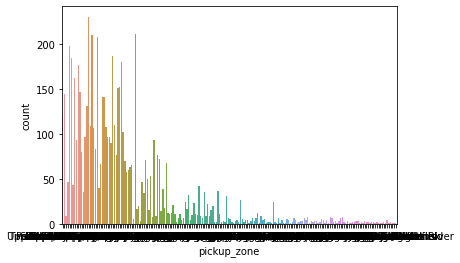

In [ ]:
sns.countplot(data=cat, x='pickup_zone')

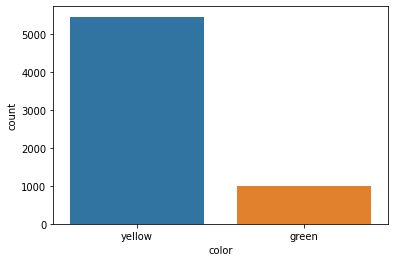

In [ ]:
sns.countplot(data=cat, x='color')

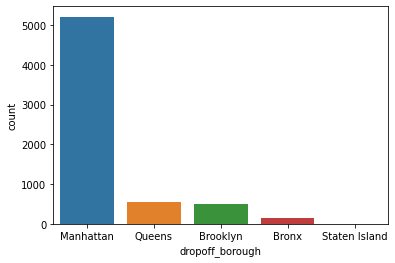

In [ ]:
sns.countplot(data=cat, x='dropoff_borough')

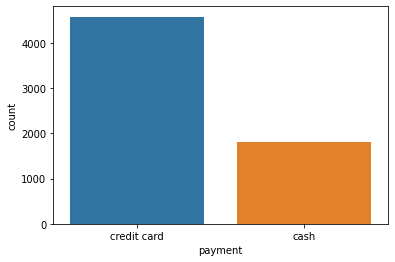

In [ ]:
sns.countplot(data=cat, x='payment')

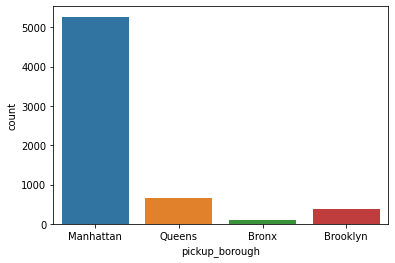

In [ ]:
sns.countplot(data=cat, x='pickup_borough')

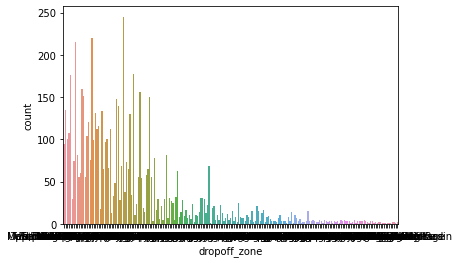

In [ ]:
sns.countplot(data=cat, x='dropoff_zone')

#### Numerical Data Visualization

In [ ]:
def kde_plot(feature):
  plt.figure(figsize=(7, 3))
  plt.title("Plot for {}".format(feature))
  ax = sns.kdeplot(num[feature])
  ax.set(xlabel=feature, ylabel='Density')
  ax.legend()
  plt.show()

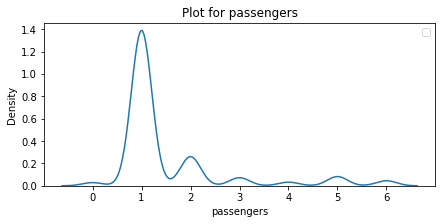

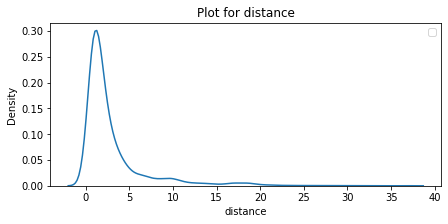

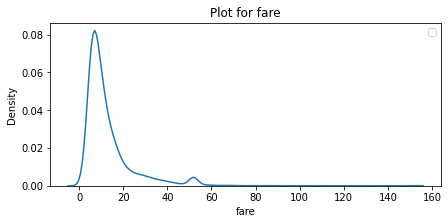

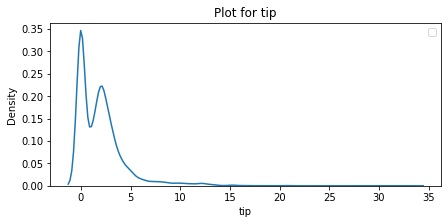

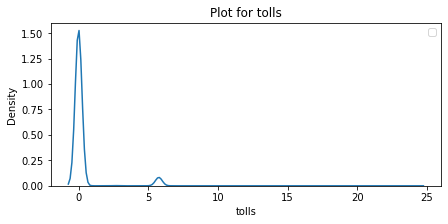

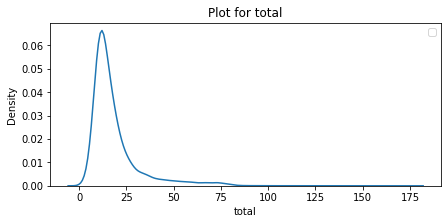

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


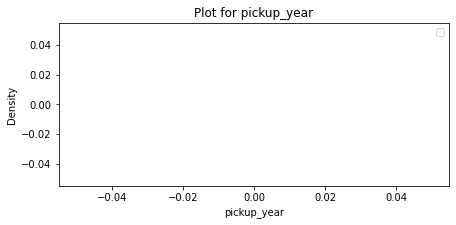

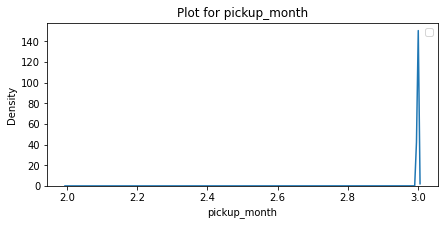

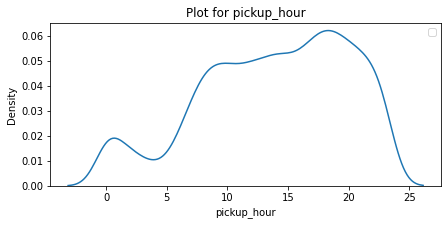

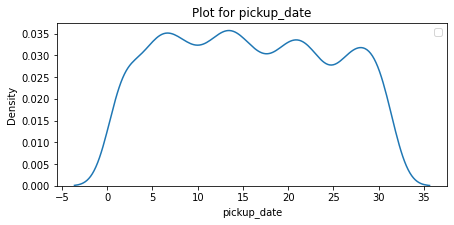

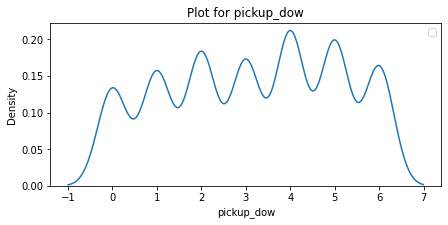

In [ ]:
for i in num.columns:
  kde_plot(i)

#### Correlation

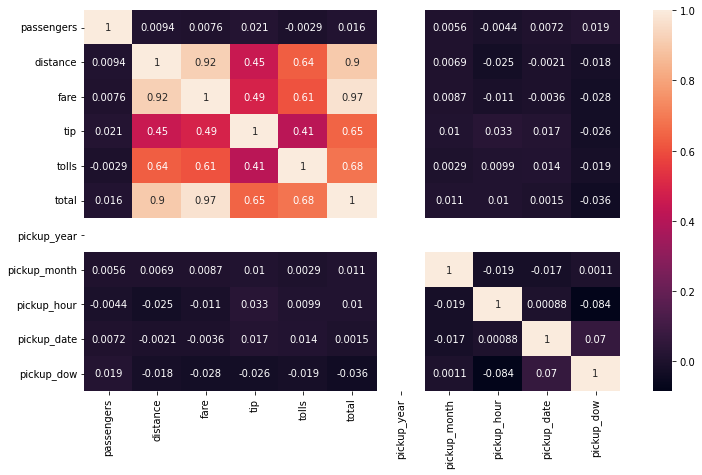

In [ ]:
correlation = taxis.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True)

##### 1) Correlation between distance and fare (regresi, corelasi)

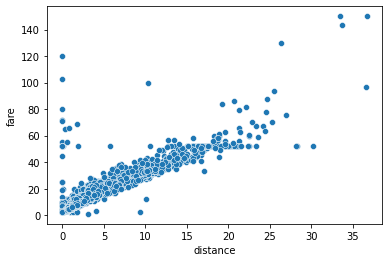

In [ ]:
sns.scatterplot(data=taxis, x='distance', y='fare')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [ ]:
X = taxis.distance.values.reshape(-1, 1)
Y = taxis.fare.values.reshape(-1, 1) 
linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)
Y_pred = linear_regressor.predict(X)

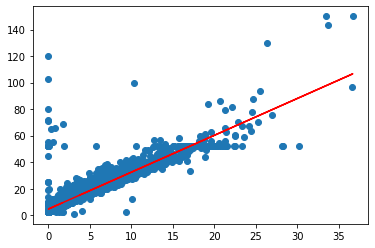

In [ ]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [ ]:
r_squared = linear_regressor.score(X, Y)
print(r_squared)

0.8465981847327084


##### 2) When is rush hour time? (Bar chart visualization of pickup_hour and count, x is time, y is count)

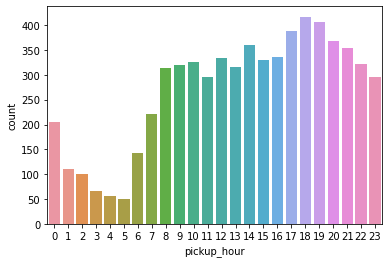

In [ ]:
sns.countplot(data=taxis, x='pickup_hour')

In [ ]:
#sns.lineplot(data=taxis, x='pickup_hour')

##### 3) Correlation between payment and tip (from which group of customer that give the most tips?)

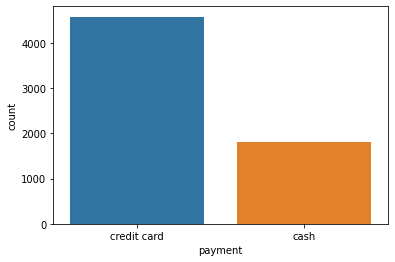

In [ ]:
# Total passengers by the payment
sns.countplot(data=taxis, x='payment')

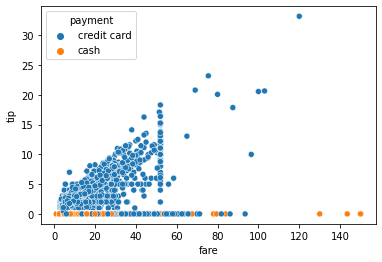

In [ ]:
sns.scatterplot(data=taxis, x='fare', y='tip', hue='payment')

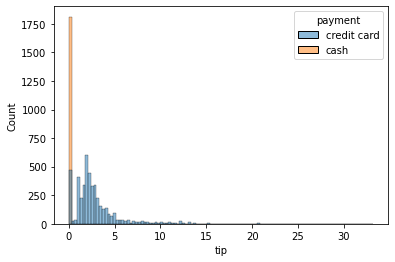

In [ ]:
sns.histplot(taxis, x='tip',hue='payment')

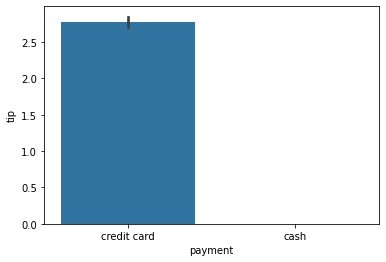

In [ ]:
sns.barplot(data=taxis, x='payment', y='tip')

##### 4) Where is the most pickup places? (Bar chart Visualization of pickup_zone) we give a recommendation of taxis distribution

-> cities (pickup borough) with the most number of orders: Manhattan.

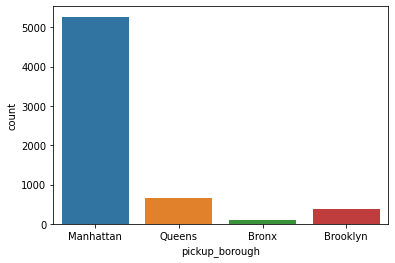

In [ ]:
sns.countplot(data=taxis, x='pickup_borough')

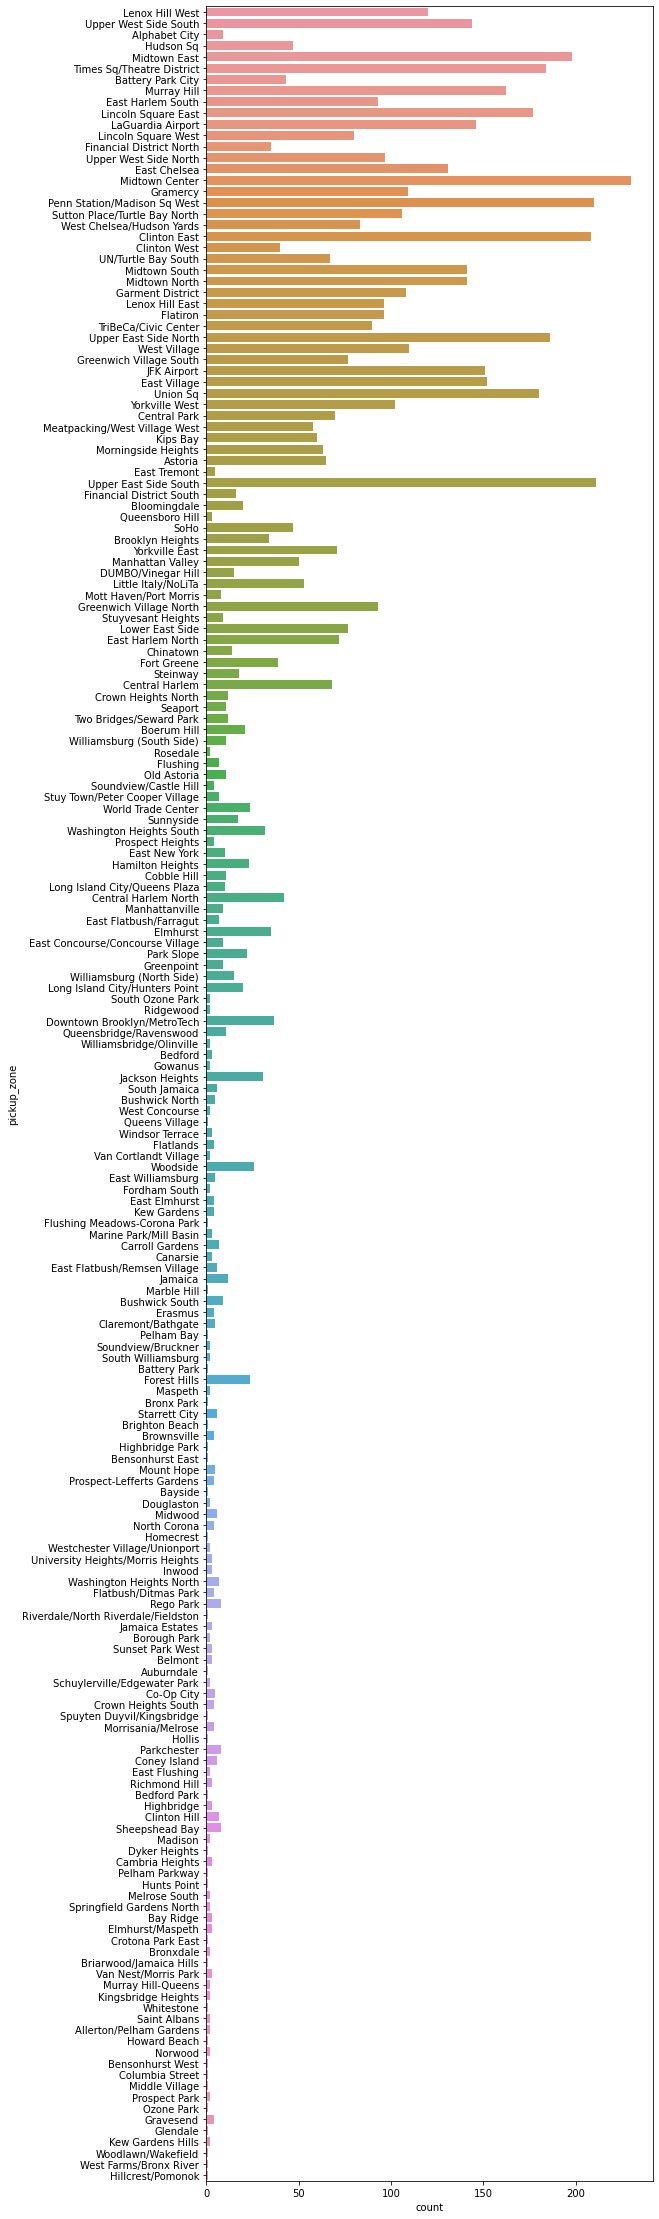

In [ ]:
plt.figure(figsize=(8,40))
sns.countplot(data=taxis, y='pickup_zone')

In [ ]:
pickup_zone_df = taxis.groupby(['pickup_zone']).size().reset_index(name='counts')

In [ ]:
pickup_zone_df.sort_values(by='counts', ascending=False).head(10)

,pickup_zone,counts
115,Midtown Center,230
172,Upper East Side South,211
134,Penn Station/Madison Sq West,210
32,Clinton East,208
116,Midtown East,198
171,Upper East Side North,186
165,Times Sq/Theatre District,184
169,Union Sq,180
100,Lincoln Square East,177
124,Murray Hill,162


##### 5) Where is the most dropoff_zone places ?

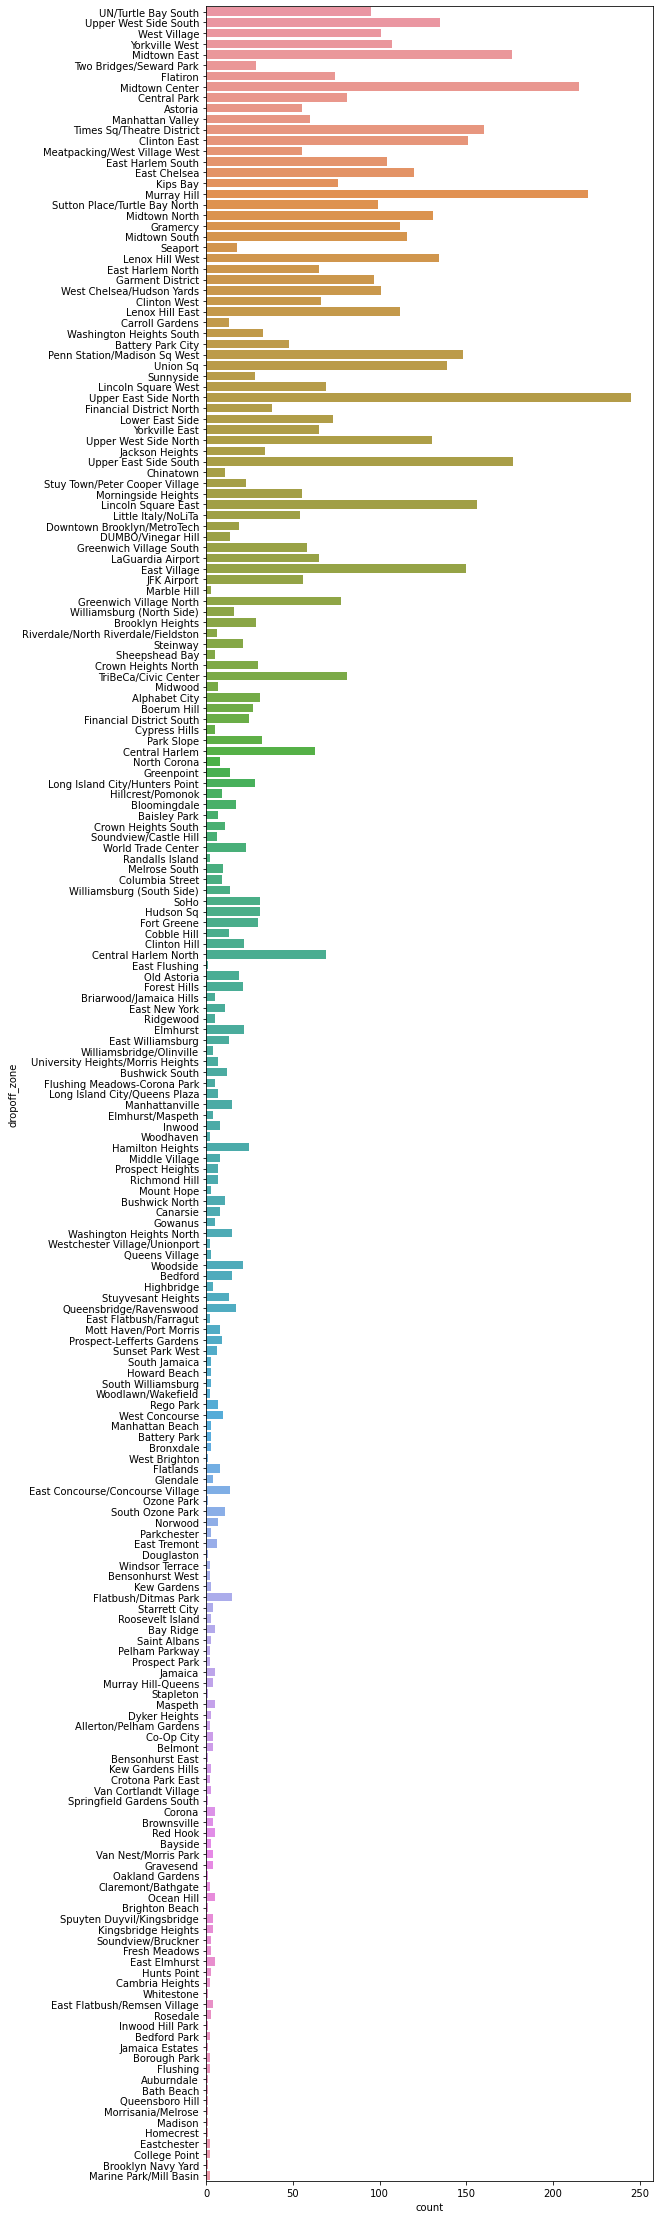

In [ ]:
plt.figure(figsize=(8,40))
sns.countplot(data=taxis, y='dropoff_zone')

In [ ]:
dropoff = taxis.groupby(['dropoff_zone']).size().reset_index(name = 'count')
dropoff = dropoff.sort_values(by = 'count', ascending=False)
dropoff

,dropoff_zone,count
179,Upper East Side North,245
128,Murray Hill,220
119,Midtown Center,215
180,Upper East Side South,177
120,Midtown East,176
...,...,...
95,Jamaica Estates,1
91,Inwood Hill Park,1
3,Auburndale,1
86,Homecrest,1


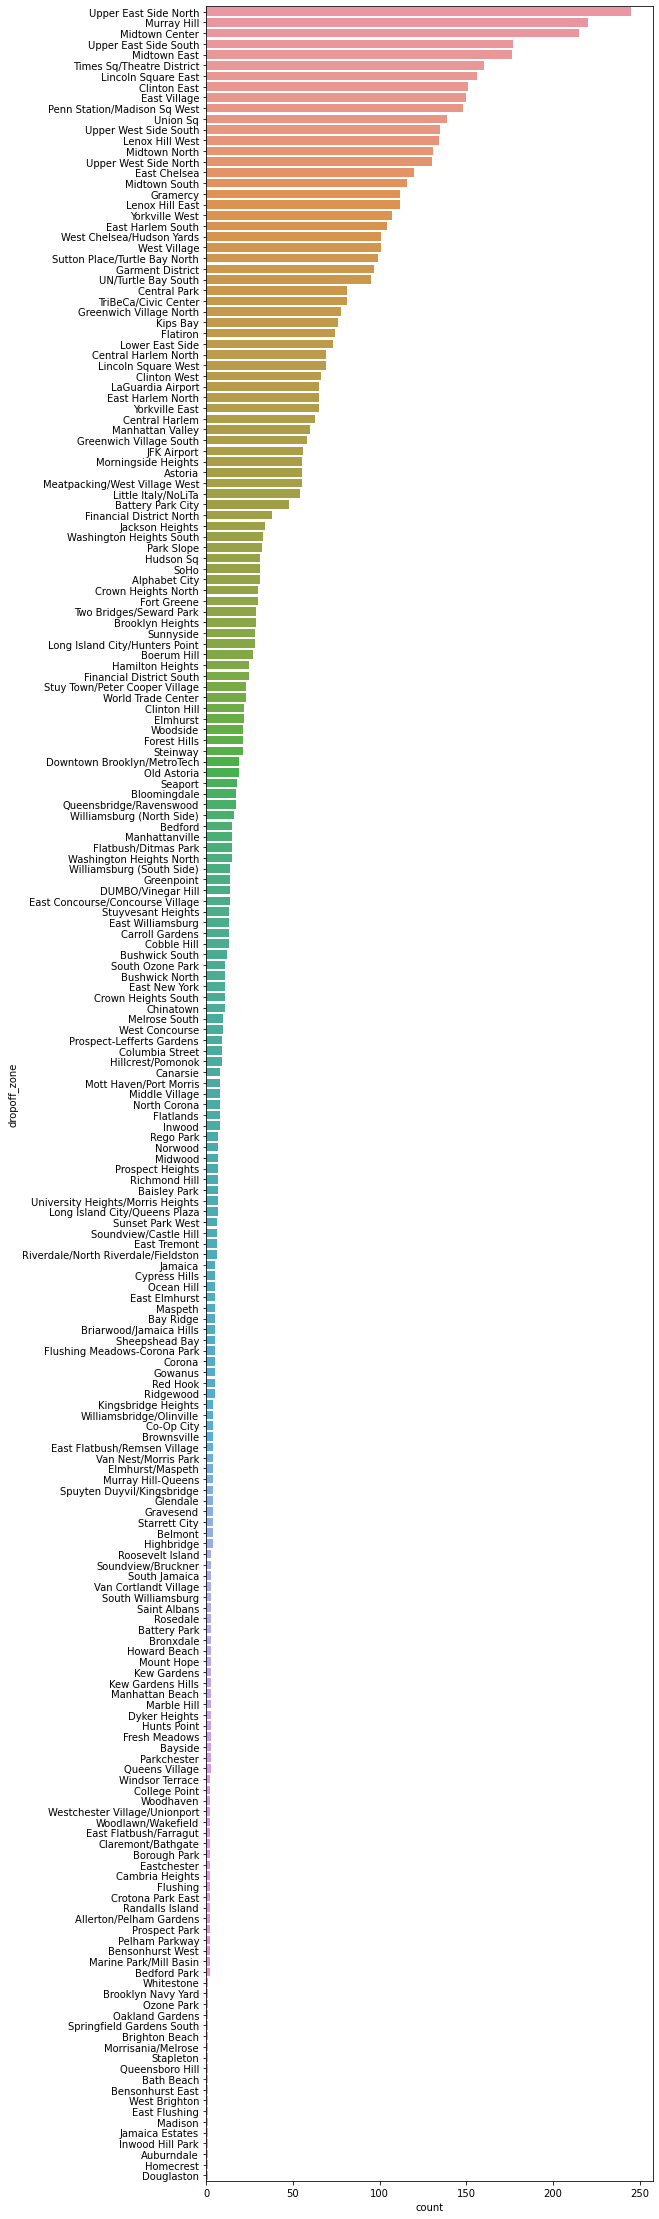

In [ ]:
plt.figure(figsize=(8,40))
sns.barplot(data=dropoff, x ='count' ,y='dropoff_zone')

##### 6)  Correlation between pickup_hour and tip (what time people do give the most tips?)

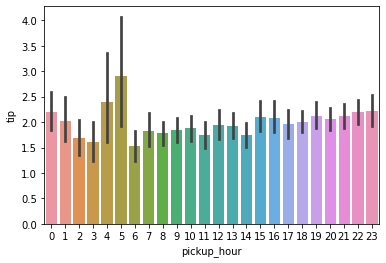

In [ ]:
sns.barplot(data=taxis, x='pickup_hour', y='tip')

#### Recommendation

- From the data on the most number of orders at a certain location, a taxi can be recommended to be at that place. But still, "Customer demand" data is needed to see if there are areas with a small number of orders have a large demand.

### TIP EDA

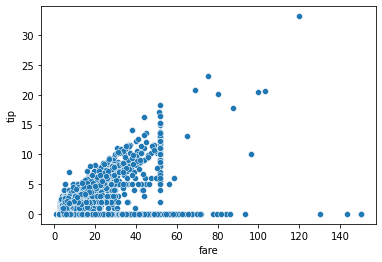

In [ ]:
sns.scatterplot(data=taxis, x='fare', y='tip')

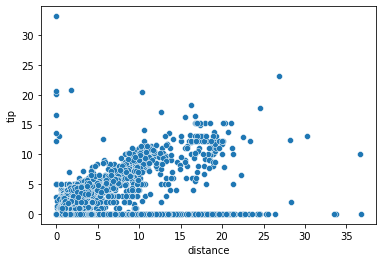

In [ ]:
sns.scatterplot(data=taxis, x='distance', y='tip')

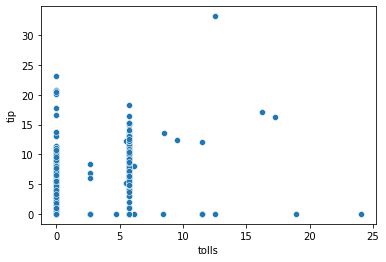

In [ ]:
sns.scatterplot(data=taxis, x='tolls', y='tip')

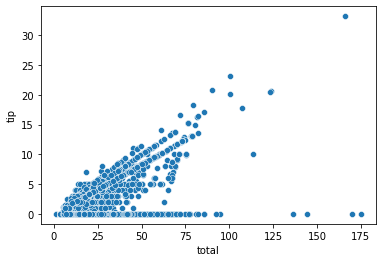

In [ ]:
sns.scatterplot(data=taxis, x='total', y='tip')

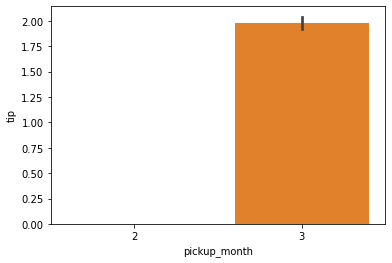

In [ ]:
sns.barplot(data=taxis, x='pickup_month', y='tip') #tidak berpengaruh, data month terlalu sedikit variasi

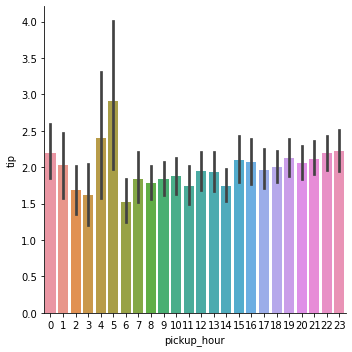

In [ ]:
sns.catplot(data=taxis, x='pickup_hour', y='tip', kind='bar')

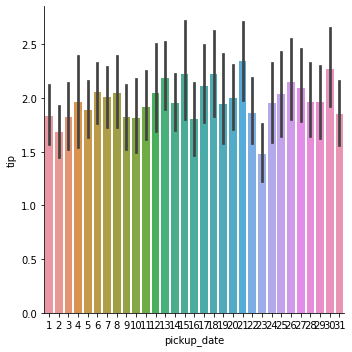

In [ ]:
sns.catplot(data=taxis, x='pickup_date', y='tip', kind='bar')

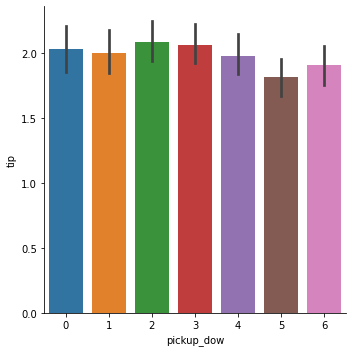

In [ ]:
sns.catplot(data=taxis, x='pickup_dow', y='tip', kind='bar')

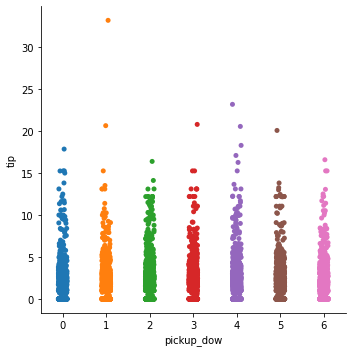

In [ ]:
sns.catplot(data=taxis, x='pickup_dow', y='tip')

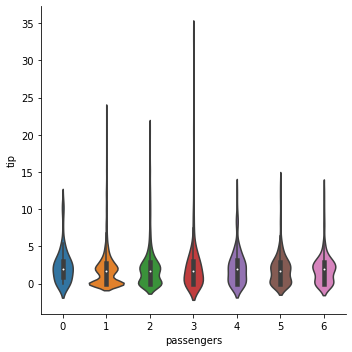

In [ ]:
sns.catplot(data=taxis, x='passengers', y='tip', kind='violin')

#### tip and pickup_borough

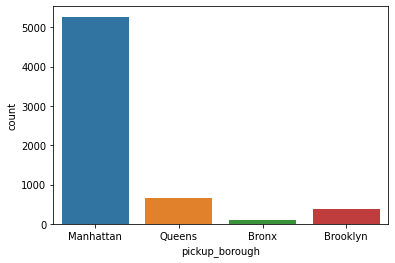

In [ ]:
sns.countplot(data=taxis, x='pickup_borough')

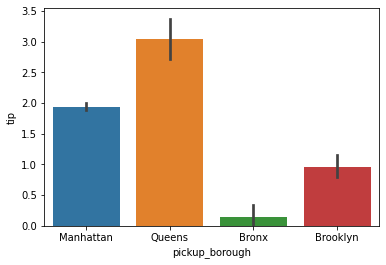

In [ ]:
sns.barplot(data=taxis, x='pickup_borough', y='tip')

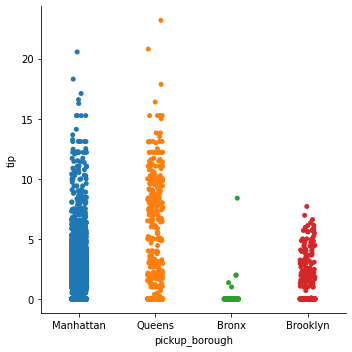

In [ ]:
sns.catplot(data=taxis, x='pickup_borough', y='tip')

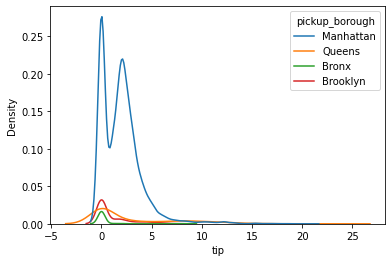

In [ ]:
sns.kdeplot(data=taxis, x='tip', hue='pickup_borough')

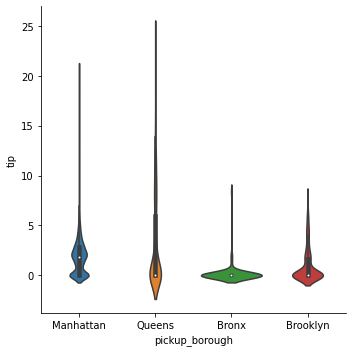

In [ ]:
sns.catplot(data=taxis, x="pickup_borough", y="tip", kind="violin")

#### tip and payment

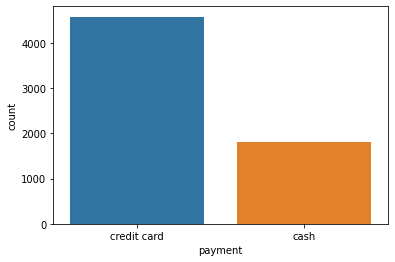

In [ ]:
sns.countplot(data=taxis, x='payment')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


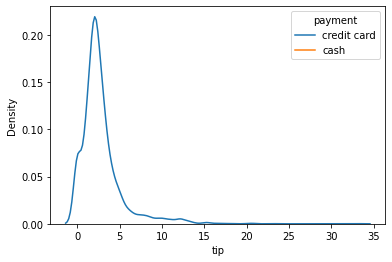

In [ ]:
sns.kdeplot(data=taxis, x='tip', hue='payment')

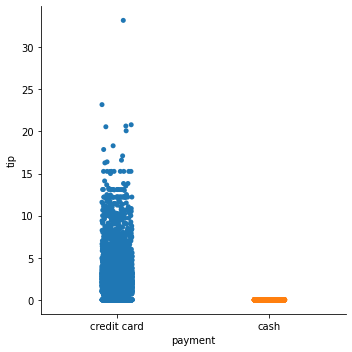

In [ ]:
sns.catplot(data=taxis, x='payment', y='tip')

#### TIP and color

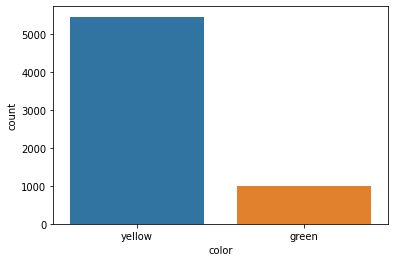

In [ ]:
sns.countplot(data=taxis, x='color')

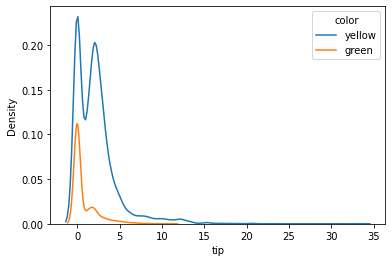

In [ ]:
sns.kdeplot(data=taxis, x='tip', hue='color')

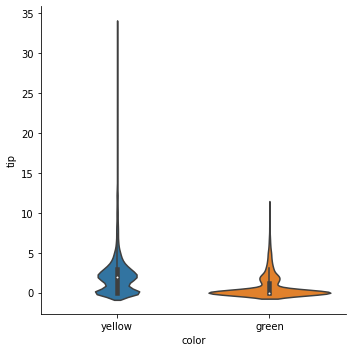

In [ ]:
sns.catplot(data=taxis, x="color", y="tip", kind="violin")

## 4. Data Preprocessing



*   Handle Missing value
*   Encoding
*   Scaling



#### 1) handle missing value

In [ ]:
taxis.isna().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
pickup_year         0
pickup_month        0
pickup_hour         0
pickup_date         0
pickup_dow          0
dtype: int64

In [ ]:
taxis = taxis.dropna()

In [ ]:
taxis.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
pickup_year        0
pickup_month       0
pickup_hour        0
pickup_date        0
pickup_dow         0
dtype: int64

In [ ]:
cleaned_taxis = taxis.drop(['pickup','dropoff','pickup_year','pickup_month'],axis=1)
cleaned_taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough,pickup_hour,pickup_date,pickup_dow
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan,20,23,5
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan,16,4,0
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan,17,27,2
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan,1,10,6
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan,13,30,5


In [ ]:
cleaned_taxis = cleaned_taxis.drop(['pickup_zone','dropoff_zone'],axis=1)
cleaned_taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,pickup_hour,pickup_date,pickup_dow
0,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Manhattan,Manhattan,20,23,5
1,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Manhattan,Manhattan,16,4,0
2,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Manhattan,Manhattan,17,27,2
3,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Manhattan,Manhattan,1,10,6
4,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Manhattan,Manhattan,13,30,5


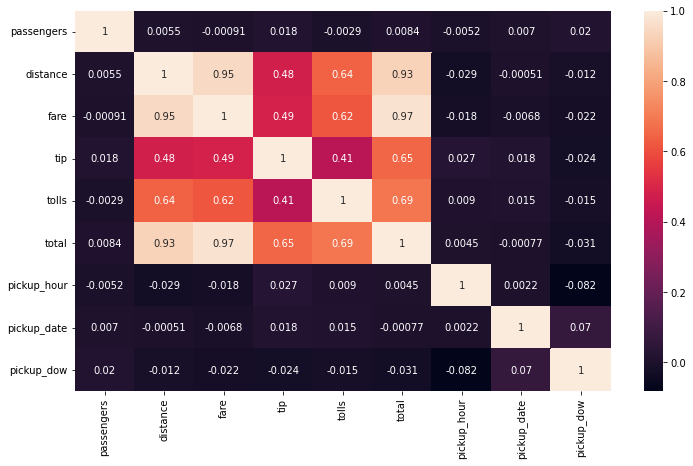

In [ ]:
correlation = cleaned_taxis.corr()
plt.figure(figsize=(12,7))
sns.heatmap(correlation,annot=True)

#### 2) Encoding

In [ ]:
cat = taxis[set(taxis.columns) - set(taxis.describe().columns)] # Category

In [ ]:
for col in cat:
  print('Kolom: ',col)
  print(cat[col].unique())

Kolom:  pickup
['2019-03-23T20:21:09.000000000' '2019-03-04T16:11:55.000000000'
 '2019-03-27T17:53:01.000000000' ... '2019-03-23T22:55:18.000000000'
 '2019-03-04T10:09:25.000000000' '2019-03-13T19:31:22.000000000']
Kolom:  pickup_zone
['Lenox Hill West' 'Upper West Side South' 'Alphabet City' 'Hudson Sq'
 'Midtown East' 'Times Sq/Theatre District' 'Battery Park City'
 'East Harlem South' 'Lincoln Square East' 'LaGuardia Airport'
 'Murray Hill' 'Lincoln Square West' 'Financial District North'
 'Upper West Side North' 'East Chelsea' 'Midtown Center' 'Gramercy'
 'Penn Station/Madison Sq West' 'Sutton Place/Turtle Bay North'
 'West Chelsea/Hudson Yards' 'Clinton East' 'Clinton West'
 'UN/Turtle Bay South' 'Midtown South' 'Midtown North' 'Garment District'
 'Lenox Hill East' 'Flatiron' 'TriBeCa/Civic Center'
 'Upper East Side North' 'West Village' 'Greenwich Village South'
 'JFK Airport' 'East Village' 'Union Sq' 'Yorkville West' 'Central Park'
 'Meatpacking/West Village West' 'Kips Bay' 'M

In [ ]:
color_dict = {
    'yellow':0,
    'green': 1
}
payment_dict = {
    'credit card':0,
    'cash': 1
}


In [ ]:
cleaned_taxis['color'] = cleaned_taxis['color'].map(color_dict)
cleaned_taxis['payment'] = cleaned_taxis['payment'].map(payment_dict)

In [ ]:
cleaned_taxis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6341 entries, 0 to 6432
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   passengers       6341 non-null   int64  
 1   distance         6341 non-null   float64
 2   fare             6341 non-null   float64
 3   tip              6341 non-null   float64
 4   tolls            6341 non-null   float64
 5   total            6341 non-null   float64
 6   color            6341 non-null   int64  
 7   payment          6341 non-null   int64  
 8   pickup_borough   6341 non-null   object 
 9   dropoff_borough  6341 non-null   object 
 10  pickup_hour      6341 non-null   int64  
 11  pickup_date      6341 non-null   int64  
 12  pickup_dow       6341 non-null   int64  
dtypes: float64(5), int64(6), object(2)
memory usage: 693.5+ KB


In [ ]:
cleaned_taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_borough,dropoff_borough,pickup_hour,pickup_date,pickup_dow
0,1,1.60,7.0,2.15,0.0,12.95,0,0,Manhattan,Manhattan,20,23,5
1,1,0.79,5.0,0.00,0.0,9.30,0,1,Manhattan,Manhattan,16,4,0
2,1,1.37,7.5,2.36,0.0,14.16,0,0,Manhattan,Manhattan,17,27,2
3,1,7.70,27.0,6.15,0.0,36.95,0,0,Manhattan,Manhattan,1,10,6
4,3,2.16,9.0,1.10,0.0,13.40,0,0,Manhattan,Manhattan,13,30,5


In [ ]:
pb_dummies = pd.get_dummies(cleaned_taxis['pickup_borough'], drop_first=True, prefix='pb')

In [ ]:
cleaned_taxis = pd.concat([cleaned_taxis.drop('pickup_borough',axis=1),pb_dummies],axis=1)

In [ ]:
db_dummies = pd.get_dummies(cleaned_taxis['dropoff_borough'], drop_first=True, prefix='db')
cleaned_taxis = pd.concat([cleaned_taxis.drop('dropoff_borough',axis=1),db_dummies],axis=1)

In [ ]:
cleaned_taxis.head()

,passengers,distance,fare,tip,tolls,total,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island
0,1,1.60,7.0,2.15,0.0,12.95,0,0,20,23,5,0,1,0,0,1,0,0
1,1,0.79,5.0,0.00,0.0,9.30,0,1,16,4,0,0,1,0,0,1,0,0
2,1,1.37,7.5,2.36,0.0,14.16,0,0,17,27,2,0,1,0,0,1,0,0
3,1,7.70,27.0,6.15,0.0,36.95,0,0,1,10,6,0,1,0,0,1,0,0
4,3,2.16,9.0,1.10,0.0,13.40,0,0,13,30,5,0,1,0,0,1,0,0


In [ ]:
num_list = ['distance','fare','tolls','total'] # continuous numerical data

In [ ]:
taxis_bs = cleaned_taxis.drop(num_list,axis=1)

In [ ]:
taxis_bs.head() # Will be joined with scaled data

,passengers,tip,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island
0,1,2.15,0,0,20,23,5,0,1,0,0,1,0,0
1,1,0.00,0,1,16,4,0,0,1,0,0,1,0,0
2,1,2.36,0,0,17,27,2,0,1,0,0,1,0,0
3,1,6.15,0,0,1,10,6,0,1,0,0,1,0,0
4,3,1.10,0,0,13,30,5,0,1,0,0,1,0,0


data that we're not scalling:
*   passengers (discrete)
*   tip (target, data that will be predicted)
*   (categorical data, encoding results discrete)

#### 3) Scalling

a. Normalization

In [ ]:
# numerical features
num_feats = cleaned_taxis[num_list]
num_feats.head()

,distance,fare,tolls,total
0,1.60,7.0,0.0,12.95
1,0.79,5.0,0.0,9.30
2,1.37,7.5,0.0,14.16
3,7.70,27.0,0.0,36.95
4,2.16,9.0,0.0,13.40


In [ ]:
num_feats.describe()

,distance,fare,tolls,total
count,6341.000000,6341.000000,6341.000000,6341.000000
mean,2.997707,12.887931,0.314793,18.310263
std,3.719775,10.722249,1.369174,12.950365
min,0.000000,1.000000,0.000000,1.300000
25%,0.990000,6.500000,0.000000,10.800000
50%,1.650000,9.500000,0.000000,14.160000
75%,3.200000,15.000000,0.000000,20.300000
max,36.700000,150.000000,24.020000,174.820000


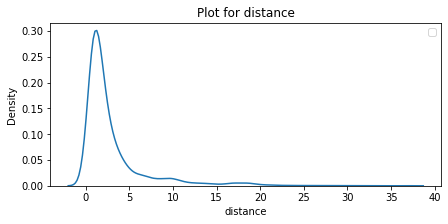

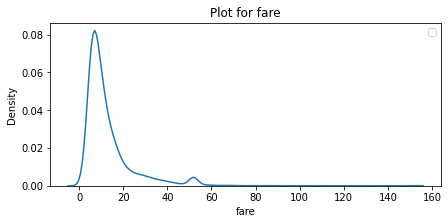

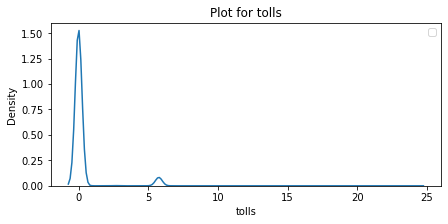

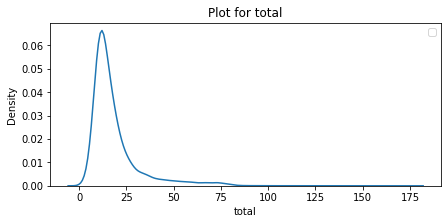

In [ ]:
for i in num_feats.columns:
   kde_plot(i)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

num_scaled = scaler.fit_transform(num_feats)
num_scaled[:5]

# Normalized number on taxis data

array([[0.04359673, 0.04026846, 0.        , 0.06713923],
       [0.02152589, 0.02684564, 0.        , 0.0461042 ],
       [0.0373297 , 0.04362416, 0.        , 0.07411249],
       [0.20980926, 0.17449664, 0.        , 0.20545182],
       [0.05885559, 0.05369128, 0.        , 0.0697326 ]])

In [ ]:
# the above array output is converted back to dataframe
import pandas as pd 

num_scaled_df = pd.DataFrame(num_scaled, columns=num_feats.columns, index=num_feats.index)
num_scaled_df.head()

,distance,fare,tolls,total
0,0.043597,0.040268,0.0,0.067139
1,0.021526,0.026846,0.0,0.046104
2,0.037330,0.043624,0.0,0.074112
3,0.209809,0.174497,0.0,0.205452
4,0.058856,0.053691,0.0,0.069733


In [ ]:
num_scaled_df.describe()

,distance,fare,tolls,total
count,6341.000000,6341.000000,6341.000000,6341.000000
mean,0.081681,0.079785,0.013105,0.098031
std,0.101356,0.071961,0.057001,0.074633
min,0.000000,0.000000,0.000000,0.000000
25%,0.026975,0.036913,0.000000,0.054749
50%,0.044959,0.057047,0.000000,0.074112
75%,0.087193,0.093960,0.000000,0.109497
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
num_feats.describe()

,distance,fare,tolls,total
count,6341.000000,6341.000000,6341.000000,6341.000000
mean,2.997707,12.887931,0.314793,18.310263
std,3.719775,10.722249,1.369174,12.950365
min,0.000000,1.000000,0.000000,1.300000
25%,0.990000,6.500000,0.000000,10.800000
50%,1.650000,9.500000,0.000000,14.160000
75%,3.200000,15.000000,0.000000,20.300000
max,36.700000,150.000000,24.020000,174.820000


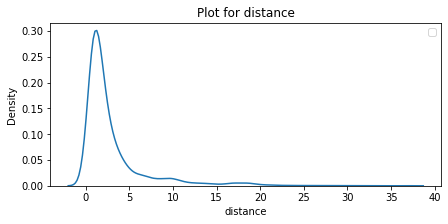

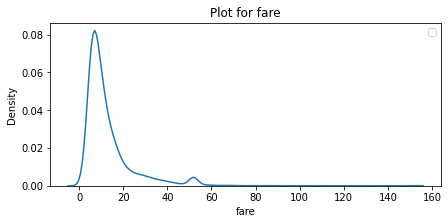

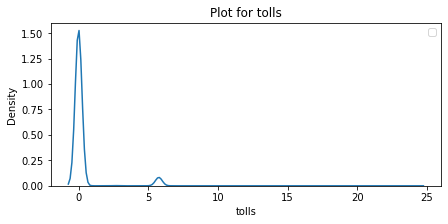

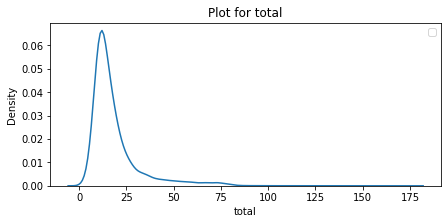

In [ ]:
for i in num_scaled_df.columns:
   kde_plot(i)

👌🏻the value of each feature is in the range of (0,1)

In [ ]:
taxis_scaled = pd.concat([taxis_bs,num_scaled_df],axis=1)

In [ ]:
taxis_scaled.head()

,passengers,tip,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island,distance,fare,tolls,total
0,1,2.15,0,0,20,23,5,0,1,0,0,1,0,0,0.043597,0.040268,0.0,0.067139
1,1,0.00,0,1,16,4,0,0,1,0,0,1,0,0,0.021526,0.026846,0.0,0.046104
2,1,2.36,0,0,17,27,2,0,1,0,0,1,0,0,0.037330,0.043624,0.0,0.074112
3,1,6.15,0,0,1,10,6,0,1,0,0,1,0,0,0.209809,0.174497,0.0,0.205452
4,3,1.10,0,0,13,30,5,0,1,0,0,1,0,0,0.058856,0.053691,0.0,0.069733


b. Standardization
-> Standard normal distribution (mean = 0 and std. = 1)

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
num_std = std_scaler.fit_transform(num_feats)
num_std[:5]

array([[-0.37578004, -0.54917537, -0.22993231, -0.41394093],
       [-0.59355231, -0.7357181 , -0.22993231, -0.69580849],
       [-0.43761661, -0.50253969, -0.22993231, -0.3204999 ],
       [ 1.26423339,  1.31625198, -0.22993231,  1.43943484],
       [-0.22522143, -0.36263263, -0.22993231, -0.37919013]])

In [ ]:
# The mean of each feature in the scaled data

std_scaler.mean_

array([ 2.99770699, 12.88793093,  0.31479262, 18.31026337])

In [ ]:
# Variance of the scaled features

std_scaler.var_

array([ 13.83454447, 114.94850094,   1.87434301, 167.68550444])

In [ ]:
import numpy as np

print(f'The mean of scaled data: {np.round(num_std.mean(axis=0))}')
print(f'The standard deviation of scaled data: {num_std.std(axis=0)}')

The mean of scaled data: [ 0.  0. -0. -0.]
The standard deviation of scaled data: [1. 1. 1. 1.]


In [ ]:
num_std_scaled_df = pd.DataFrame(num_std, columns=num_feats.columns)
num_std_scaled_df.head()

,distance,fare,tolls,total
0,-0.375780,-0.549175,-0.229932,-0.413941
1,-0.593552,-0.735718,-0.229932,-0.695808
2,-0.437617,-0.502540,-0.229932,-0.320500
3,1.264233,1.316252,-0.229932,1.439435
4,-0.225221,-0.362633,-0.229932,-0.379190


In [ ]:
num_std_scaled_df.describe()

,distance,fare,tolls,total
count,6.341000e+03,6.341000e+03,6.341000e+03,6.341000e+03
mean,8.516204e-17,3.137549e-17,-4.930434e-17,-7.619761e-17
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-8.059475e-01,-1.108804e+00,-2.299323e-01,-1.313600e+00
25%,-5.397814e-01,-5.958111e-01,-2.299323e-01,-5.799725e-01
50%,-3.623373e-01,-3.159970e-01,-2.299323e-01,-3.204999e-01
75%,5.438742e-02,1.969956e-01,-2.299323e-01,1.536554e-01
max,9.061019e+00,1.278863e+01,1.731487e+01,1.208631e+01


In [ ]:
taxis_scaled.head()

,passengers,tip,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island,distance,fare,tolls,total
0,1,2.15,0,0,20,23,5,0,1,0,0,1,0,0,0.043597,0.040268,0.0,0.067139
1,1,0.00,0,1,16,4,0,0,1,0,0,1,0,0,0.021526,0.026846,0.0,0.046104
2,1,2.36,0,0,17,27,2,0,1,0,0,1,0,0,0.037330,0.043624,0.0,0.074112
3,1,6.15,0,0,1,10,6,0,1,0,0,1,0,0,0.209809,0.174497,0.0,0.205452
4,3,1.10,0,0,13,30,5,0,1,0,0,1,0,0,0.058856,0.053691,0.0,0.069733


In [ ]:
taxis_scaled.describe()

,passengers,tip,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island,distance,fare,tolls,total
count,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,1.544078,1.972703,0.152657,0.283078,13.899227,15.758871,3.163697,0.059612,0.824160,0.100615,0.078379,0.815644,0.084214,0.000315,0.081681,0.079785,0.013105,0.098031
std,1.207948,2.361897,0.359685,0.450530,6.052512,8.888108,1.914913,0.236785,0.380714,0.300842,0.268788,0.387805,0.277730,0.017758,0.101356,0.071961,0.057001,0.074633
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.026975,0.036913,0.000000,0.054749
50%,1.000000,1.750000,0.000000,0.000000,15.000000,15.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.044959,0.057047,0.000000,0.074112
75%,2.000000,2.820000,0.000000,1.000000,19.000000,23.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.087193,0.093960,0.000000,0.109497
max,6.000000,23.190000,1.000000,1.000000,23.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


mean = 0 and std = 1 👌🏻

## 5. Training
*   Linear Regression
*   SVM
*   Decision Trees
*   Random Forests

#### 1) Linear Regression

In [ ]:
#split Data
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(taxis_scaled, test_size=0.2, random_state=42)

In [ ]:
# separating target: tip 
training_input_data = train_data.drop('tip', axis=1)
training_labels = train_data['tip']

In [ ]:
#import modul linear regression
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

In [ ]:
# fitting model
reg_model.fit(training_input_data, training_labels)

LinearRegression()

In [ ]:
training_input_data.columns

Index(['passengers', 'color', 'payment', 'pickup_hour', 'pickup_date',
       'pickup_dow', 'pb_Brooklyn', 'pb_Manhattan', 'pb_Queens', 'db_Brooklyn',
       'db_Manhattan', 'db_Queens', 'db_Staten Island', 'distance', 'fare',
       'tolls', 'total'],
      dtype='object')

In [ ]:
reg_model.coef_

array([-1.14153713e-02,  8.07041670e-01, -5.44141952e-01, -1.76254995e-02,
        5.72800621e-04,  2.45502531e-02, -1.37602821e-01, -3.42319264e-01,
        2.63917342e-01, -4.11304330e-02, -5.71250270e-01, -1.04786263e-01,
        9.50057540e-01,  1.14064645e-01, -1.12357391e+02, -1.77030117e+01,
        1.33167774e+02])

In [ ]:
reg_model.intercept_

-0.9474002786771238

In [ ]:
#model evaluation
from sklearn.metrics import mean_squared_error
predictions = reg_model.predict(training_input_data)

mse = mean_squared_error(training_labels, predictions)

rmse = np.sqrt(mse)
rmse

0.6203072010417787

In [ ]:
#model evaluation
from sklearn.model_selection import cross_val_score

scoring = 'neg_root_mean_squared_error' 

scores = cross_val_score(reg_model, training_input_data, training_labels, scoring=scoring, cv=10)

In [ ]:
scores = -scores

scores.mean()

0.6245456000614763

In [ ]:
#Cross validation predict
from sklearn.model_selection import cross_val_predict

predictions = cross_val_predict(reg_model, training_input_data, training_labels, cv=10)

In [ ]:
mse_cross_val = mean_squared_error(training_labels, predictions)
rmse_cross_val = np.sqrt(mse_cross_val)
rmse_cross_val

0.6254853393987142

#### 2) Decision Trees (for regression)

In [ ]:
taxis_scaled

,passengers,tip,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island,distance,fare,tolls,total
0,1,2.15,0,0,20,23,5,0,1,0,0,1,0,0,0.043597,0.040268,0.0,0.067139
1,1,0.00,0,1,16,4,0,0,1,0,0,1,0,0,0.021526,0.026846,0.0,0.046104
2,1,2.36,0,0,17,27,2,0,1,0,0,1,0,0,0.037330,0.043624,0.0,0.074112
3,1,6.15,0,0,1,10,6,0,1,0,0,1,0,0,0.209809,0.174497,0.0,0.205452
4,3,1.10,0,0,13,30,5,0,1,0,0,1,0,0,0.058856,0.053691,0.0,0.069733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,1,1.06,1,0,9,31,6,0,1,0,0,1,0,0,0.020436,0.023490,0.0,0.029161
6429,1,0.00,1,0,17,31,6,0,0,1,0,0,0,0,0.510627,0.382550,0.0,0.331374
6430,1,0.00,1,1,22,23,5,1,0,0,1,0,0,0,0.112807,0.100671,0.0,0.092208
6431,1,0.00,1,0,10,4,0,1,0,0,1,0,0,0,0.030518,0.033557,0.0,0.031697


In [ ]:
taxis_scaled.describe()

,passengers,tip,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island,distance,fare,tolls,total
count,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000,6341.000000
mean,1.544078,1.972703,0.152657,0.283078,13.899227,15.758871,3.163697,0.059612,0.824160,0.100615,0.078379,0.815644,0.084214,0.000315,0.081681,0.079785,0.013105,0.098031
std,1.207948,2.361897,0.359685,0.450530,6.052512,8.888108,1.914913,0.236785,0.380714,0.300842,0.268788,0.387805,0.277730,0.017758,0.101356,0.071961,0.057001,0.074633
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.026975,0.036913,0.000000,0.054749
50%,1.000000,1.750000,0.000000,0.000000,15.000000,15.000000,3.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.044959,0.057047,0.000000,0.074112
75%,2.000000,2.820000,0.000000,1.000000,19.000000,23.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.087193,0.093960,0.000000,0.109497
max,6.000000,23.190000,1.000000,1.000000,23.000000,31.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
labels_taxis = taxis_scaled[['tip']]

In [ ]:
data_taxis = taxis_scaled.drop(['tip'],axis=1)

In [ ]:
data_taxis

,passengers,color,payment,pickup_hour,pickup_date,pickup_dow,pb_Brooklyn,pb_Manhattan,pb_Queens,db_Brooklyn,db_Manhattan,db_Queens,db_Staten Island,distance,fare,tolls,total
0,1,0,0,20,23,5,0,1,0,0,1,0,0,0.043597,0.040268,0.0,0.067139
1,1,0,1,16,4,0,0,1,0,0,1,0,0,0.021526,0.026846,0.0,0.046104
2,1,0,0,17,27,2,0,1,0,0,1,0,0,0.037330,0.043624,0.0,0.074112
3,1,0,0,1,10,6,0,1,0,0,1,0,0,0.209809,0.174497,0.0,0.205452
4,3,0,0,13,30,5,0,1,0,0,1,0,0,0.058856,0.053691,0.0,0.069733
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,1,1,0,9,31,6,0,1,0,0,1,0,0,0.020436,0.023490,0.0,0.029161
6429,1,1,0,17,31,6,0,0,1,0,0,0,0,0.510627,0.382550,0.0,0.331374
6430,1,1,1,22,23,5,1,0,0,1,0,0,0,0.112807,0.100671,0.0,0.092208
6431,1,1,0,10,4,0,1,0,0,1,0,0,0,0.030518,0.033557,0.0,0.031697


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_taxis,labels_taxis, test_size=0.1,random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(X_train), len(X_test)))

The size of training data is: 5706 
The size of testing data is: 635


In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

since decision trees don't care if the features are scaled or not...we don't need to scale the features.

In [ ]:
# evaluating decision trees

from sklearn.metrics import mean_squared_error

def predict(input_data,model,labels):
    """
    Take the input data, model and labels and return predictions
    
    """
    
    preds = model.predict(input_data)
    mse = mean_squared_error(labels,preds)
    rmse = np.sqrt(mse)
    rmse
    
    return rmse

In [ ]:
predict(X_train, tree_reg, y_train)

4.83876964443396e-16

In [ ]:
# improving decision trees
tree_reg.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Setup the parameters and distributions to sample from: param_dist
param_dist = {"max_depth": [3, None],
              "max_features": randint(1, 9),
              "min_samples_leaf": randint(1, 9)}
            
# Instantiate the RandomizedSearchCV object: tree_cv
tree_cv = RandomizedSearchCV(DecisionTreeRegressor(), param_dist, cv=5)

# Fit it to the data
tree_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score: {}".format(tree_cv.best_score_))

Decision Tree Parameters: {'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2}
Best score: 0.761869973704219


In [ ]:
tree_cv.best_params_

{'max_depth': None, 'max_features': 6, 'min_samples_leaf': 2}

In [ ]:
tree_cv.best_estimator_

DecisionTreeRegressor(max_features=6, min_samples_leaf=2)

In [ ]:
tree_best = tree_cv.best_estimator_

In [ ]:
predict(X_train, tree_best, y_train)

0.3775845150949748

#### 3) Random Forests

In [ ]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(min_samples_split=2,bootstrap=False, random_state=42,n_jobs=-1)

forest_reg.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestRegressor(bootstrap=False, n_jobs=-1, random_state=42)

In [ ]:
# Evaluating Random Forest Regressor

from sklearn.metrics import mean_squared_error

def predict(input_data,model,labels):
    """
    Take the input data, model and labels and return predictions
    
    """
    
    preds = model.predict(input_data)
    mse = mean_squared_error(labels,preds)
    rmse = np.sqrt(mse)
    rmse
    
    return rmse

In [ ]:
predict(X_train, forest_reg, y_train)

4.067877223940713e-15

In [ ]:
# Improving
forest_reg.get_params()

{'bootstrap': False,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
#improving
#Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 5)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
'max_features': max_features,
'max_depth': max_depth,
'min_samples_split': min_samples_split,
'min_samples_leaf': min_samples_leaf
}

# Initialize the RandomizedSearchCV object with estimators is RandomForestRegressor of
#cross validation is 5 with n_jobs = -1 ( that is parallel processing )

random_rf = RandomizedSearchCV(RandomForestRegressor(), param_distributions=random_grid, cv=5, n_iter=10,n_jobs=-1)

# fit the object
random_rf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
# Display the best estimator
print(random_rf.best_estimator_)

RandomForestRegressor(max_depth=10, n_estimators=400)


In [ ]:
# Display the best score
print(random_rf.best_score_)

0.9039126572828924


In [ ]:
# Display the best selected parameter by the randomizedSearchCV
print(random_rf.best_params_)

{'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}


In [ ]:
rf_best = random_rf.best_estimator_

In [ ]:
predict(X_train,rf_best, y_train)

0.4268725059410725

## 6. Conclusion

In [ ]:
predict(X_test, reg_model, y_test)

0.586953321063154

In [ ]:
predict(X_test, tree_best, y_test)

0.8644087916080486

In [ ]:
predict(X_test, rf_best, y_test)

0.5931350811906628

Linear Regression 0.6254853393987142 <br>
Random forests 0.4268725059410725 <br>
Decision Tree 0.3775845150949748

The best model for this classification is Random Forest, because the accurracy score for this model is not overfit, and the error score between train and test is kind of similar.